In [100]:
import numpy as np
import matplotlib.pyplot as plt
from K_means import KMeans

In [101]:
image_name = 'beach'
original_img = plt.imread(f'data/{image_name}.jpg')

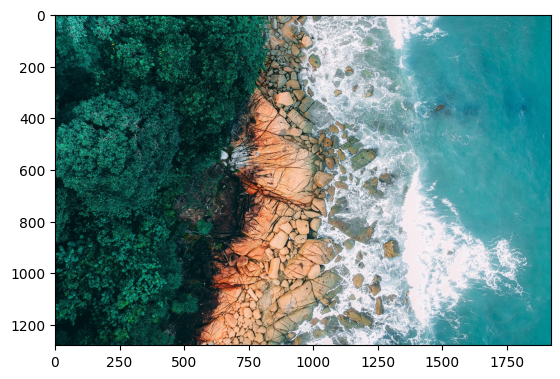

In [102]:
plt.imshow(original_img)

In [103]:
print(original_img.shape)

(1279, 1920, 3)


In [104]:
original_img = original_img / 255

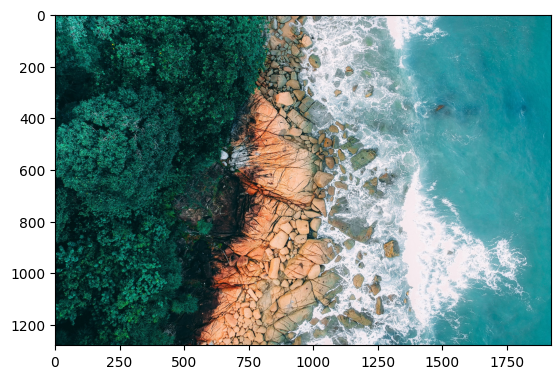

In [105]:
plt.imshow(original_img)

In [106]:
X_img = original_img.reshape(original_img.shape[0] * original_img.shape[1], 3)

In [107]:
print(X_img.shape)

(2455680, 3)


In [108]:
k = 5
n_iter = 10

In [109]:
kmeans = KMeans(X_img, k)
kmeans.train(n_iter)

In [110]:
kmeans.calculateClosestPoints()
labels = kmeans.labels
loss = kmeans.calculateLoss()
print("Final cluster assignments:", labels)
print("Final centroids:\n", kmeans.centroids)
print("Final loss:", loss)

Final cluster assignments: [4 4 4 ... 4 4 4]
Final centroids:
 [[0.74652257 0.57111068 0.43361053]
 [0.54016237 0.67261516 0.69202507]
 [0.04645665 0.18241594 0.1632103 ]
 [0.90623617 0.89031122 0.89154173]
 [0.17976569 0.54801725 0.56280819]]
Final loss: 0.14195813964620518


In [111]:
print(labels.shape)

(2455680,)


In [112]:
def distance(color, assignedColor):
    return np.linalg.norm(np.array(color) - np.array(assignedColor))

In [126]:
X_recovered = kmeans.centroids[labels, :]
print(X_recovered)

[[0.17976569 0.54801725 0.56280819]
 [0.17976569 0.54801725 0.56280819]
 [0.17976569 0.54801725 0.56280819]
 ...
 [0.17976569 0.54801725 0.56280819]
 [0.17976569 0.54801725 0.56280819]
 [0.17976569 0.54801725 0.56280819]]


In [132]:
X_gradient = abs(X_recovered - X_img)
print(X_gradient)

[[0.17976569 0.04806118 0.00189769]
 [0.17976569 0.02845334 0.02947486]
 [0.17976569 0.05782117 0.13535721]
 ...
 [0.16015785 0.01276707 0.03719181]
 [0.17584412 0.0088455  0.02934867]
 [0.15623628 0.02845334 0.04895652]]


In [133]:
X_gradient = np.reshape(X_gradient, original_img.shape)

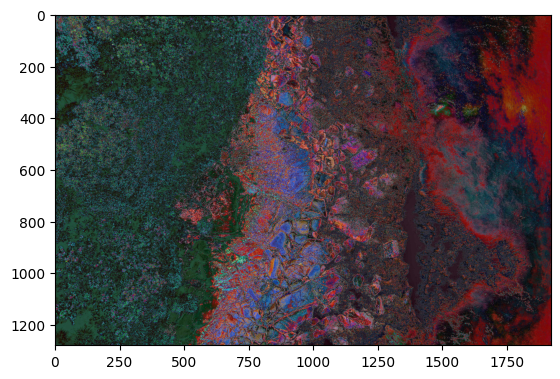

In [137]:
X_gradient_boosted = (X_gradient * 3) % 1
plt.imshow(X_gradient_boosted)

In [117]:
X_recovered = np.reshape(X_recovered, original_img.shape)

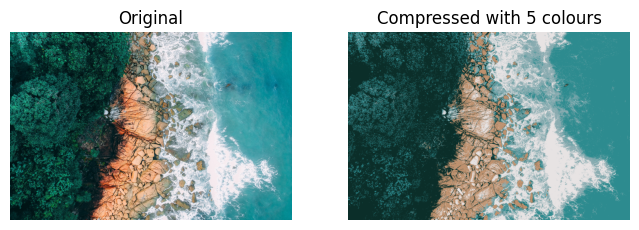

In [118]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title(f'Compressed with {k} colours')
ax[1].set_axis_off()

In [119]:
plt.imsave(f'output/{image_name}_recovered.jpg', X_recovered)